Enter number of days: 30
Enter number of doses missed (0, 1, or 2): 0


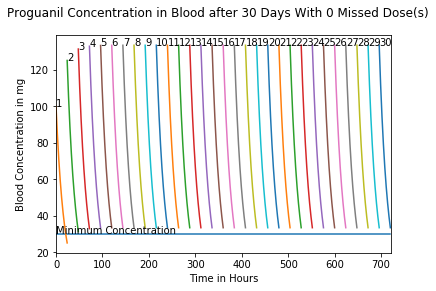

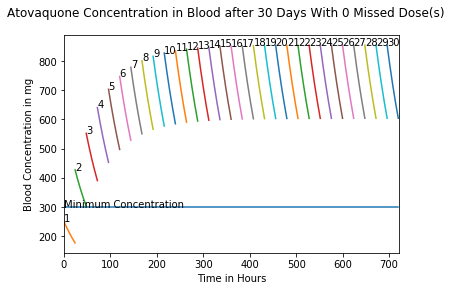

In [3]:
#Author:  Ryan Florida
#Purpose: Attempt at modelling concentration of two particular drugs, Proguanil
#         and Atovaquone, in the blood stream during a given number of days.
    
#Constant

# Make all appropriate imports so as to reduce clutter in codes below.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, log, array, linspace, sum
from numpy.random import random
from multiprocessing import Queue, Process
from math import trunc
import scipy as sp
from scipy.integrate import *
import math
import random as rand
from ipywidgets import interact

EPSILON = 1e-4
 
#******************************************************************************
#0: Main.
def main():
    days = int(input("Enter number of days: "))
    dosesMissed = int(input("Enter number of doses missed (0, 1, or 2): "))
    t_vals = np.linspace(0, days*24, 200)
 
    plot(t_vals, 100, 12, 30, "Proguanil", dosesMissed)
    plot(t_vals, 250, 48, 300, "Atovaquone", dosesMissed)
 
 
#******************************************************************************
#1: Plot function with desired parameters.
def plot(t_vals, initial, half_life, threshold, title, dosesMissed):
    numOfDays = int(max(t_vals)/24)
    missedDay = False
 
    #Plot minimum concentration allowed as well as labelling the graph and
    #axes and constraining the x axis.
    plt.annotate("Minimum Concentration", xy = (0, threshold),xytext =\
            (0, threshold))
    plt.plot(t_vals, array([threshold for t in range(len(t_vals))]))
    plt.suptitle("%s Concentration in Blood after %d Days With %d Missed\
 Dose(s)" %(title, numOfDays, dosesMissed))
    plt.xlabel("Time in Hours")
    plt.ylabel("Blood Concentration in mg")
    plt.xlim(0,t_vals[-1]+1)
 
    #Plot curves representing concentration in the blood each 24 hour period.
    for i in range(numOfDays):
        #Here we check for any missed doses and assign the appropriate value
        #to the missed day variable.
        if (dosesMissed == 2 and i == numOfDays - 2) or (dosesMissed == 1 and\
                i == numOfDays - 1):
            missedDay = i + 1
        elif dosesMissed == 2 and i == numOfDays - 1:
            missedDay = i
        #Each interval is split up into 24-hour bins.
        interval_i = linspace(i*24, (i+1)*24 - EPSILON, 200)
        #Calculate the function on the ith interval.
        fxn = decay(interval_i, initial, half_life, missedDay)
 
        #This is just for readability of the graph.
        if numOfDays <= 10:
            plt.annotate('Day'+str(i+1), xy = (interval_i[0], fxn[0]),\
                    xytext =(interval_i[0]+EPSILON, fxn[0]+EPSILON))
        elif numOfDays <= 30:
            plt.annotate(str(i+1), xy = (interval_i[0], fxn[0]),\
                    xytext =(interval_i[0]+EPSILON, fxn[0]+EPSILON))
        #Plot the function values.
        plt.plot(interval_i, fxn, label='Day' + str(i))
 
    #Display plot.
    plt.show()
 
#******************************************************************************
#2: Parallelize
def Compute(low, high, q):
    numOfPrimes = 0
    for num in range(low, high+1):
        if IsPrime(num):
            numOfPrimes += 1
    q.put(numOfPrimes)
 
#******************************************************************************
#3: Exponential decay function.
def decay(t, initial, half_life, missedDay):
    T = []
    if not missedDay:
        for x in t:
            r = 0
            for n in range(trunc(x/24) + 1):
                r += initial*exp(-log(2)*(x - 24*n)/half_life)
            T.append(r)
 
    else:
        for x in t:
            r = 0
            for n in range(missedDay-1):
                r += initial*exp(-log(2)*(x-24*n)/half_life)
            T.append(r)
 
    return(T)
 
#Call main.
main()